In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import altair as alt
import plotly as plx
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'../scripts/')
warnings.filterwarnings('ignore')

In [2]:
from plots import Plots
from data_info import DataInfo
from log_helper import Logger_Class
from data_clean import DataClean

In [3]:
train_data = pd.read_csv('../data/train_store_data.csv')
test_data = pd.read_csv('../data/test_store_data.csv')

In [4]:
train_data.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,2015,7,30,5020.0,546,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,2015,7,29,4782.0,523,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,2015,7,28,5011.0,560,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,2015,7,27,6102.0,612,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [5]:
train_info = DataInfo(train_data)
train_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [6]:
test_info = DataInfo(test_data)
test_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %


# Q1: Checking for distribution in both train and test data sets. 
* ### Are the promotion distributed similarly between these two groups?

In [7]:
pd.options.display.float_format = "{:,.2f}".format
train_data.describe()

,Store,DayOfWeek,Year,Month,Day,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00","1,017,209.00"
mean,558.43,4.00,"2,013.83",5.85,15.70,"5,472.86",633.15,0.83,0.38,0.18,"3,301.09",4.93,"1,370.17",0.50,11.65,"1,007.01"
std,321.91,2.00,0.78,3.33,8.79,"3,323.99",464.41,0.38,0.49,0.38,"3,582.75",4.28,935.36,0.50,15.32,"1,005.88"
min,1.00,1.00,"2,013.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,"2,013.00",3.00,8.00,"3,727.00",405.00,1.00,0.00,0.00,710.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,"2,014.00",6.00,16.00,"5,744.00",609.00,1.00,0.00,0.00,"2,325.00",4.00,"2,006.00",1.00,1.00,"2,009.00"
75%,838.00,6.00,"2,014.00",8.00,23.00,"7,584.00",837.00,1.00,1.00,0.00,"4,270.00",9.00,"2,011.00",1.00,22.00,"2,012.00"
max,"1,115.00",7.00,"2,015.00",12.00,31.00,"14,049.00","7,388.00",1.00,1.00,1.00,"15,770.00",12.00,"2,015.00",1.00,50.00,"2,015.00"


In [8]:
test_data.describe()

,Id,Store,DayOfWeek,Year,Month,Day,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,"41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00","41,088.00"
mean,"20,544.50",555.90,3.98,"2,015.00",8.35,13.52,0.85,0.40,0.44,"3,345.93",4.43,"1,264.79",0.58,14.18,"1,168.08"
std,"11,861.23",320.27,2.02,0.00,0.48,8.45,0.35,0.49,0.50,"3,507.32",4.21,969.98,0.49,16.18,992.77
min,1.00,1.00,1.00,"2,015.00",8.00,1.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,"10,272.75",279.75,2.00,"2,015.00",8.00,6.75,1.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00
50%,"20,544.50",553.50,4.00,"2,015.00",8.00,12.50,1.00,0.00,0.00,"2,325.00",4.00,"2,005.00",1.00,9.00,"2,010.00"
75%,"30,816.25",832.25,6.00,"2,015.00",9.00,19.25,1.00,1.00,1.00,"4,572.50",9.00,"2,011.00",1.00,31.00,"2,012.00"
max,"41,088.00","1,115.00",7.00,"2,015.00",9.00,31.00,1.00,1.00,1.00,"15,770.00",12.00,"2,015.00",1.00,49.00,"2,015.00"


#### Promo and sales

In [9]:
sales_promo = train_data.groupby('Promo')["Sales"].sum()
promo_sale = pd.DataFrame({'Promo':sales_promo.index, 'sales_sum':sales_promo.values})
promo_sale

,Promo,sales_sum
0,0,"2,685,395,864.00"
1,1,"2,881,642,583.00"


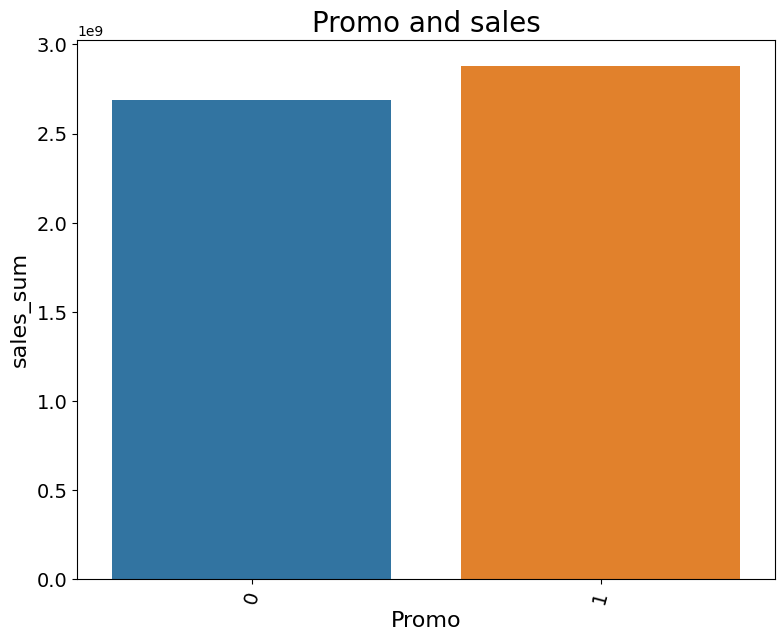

In [10]:
PLT  = Plots()
PLT.plot_bar(promo_sale, 'Promo', 'sales_sum', 'Promo and sales', 'Promo', 'sales_sum')

#### Promo and Customers

In [11]:
customers_promo = train_data.groupby('Promo')["Customers"].sum()
promo_custumers = pd.DataFrame({'Promo':customers_promo.index, 'Customers':customers_promo.values})
promo_custumers


,Promo,Customers
0,0,325777807
1,1,318263948


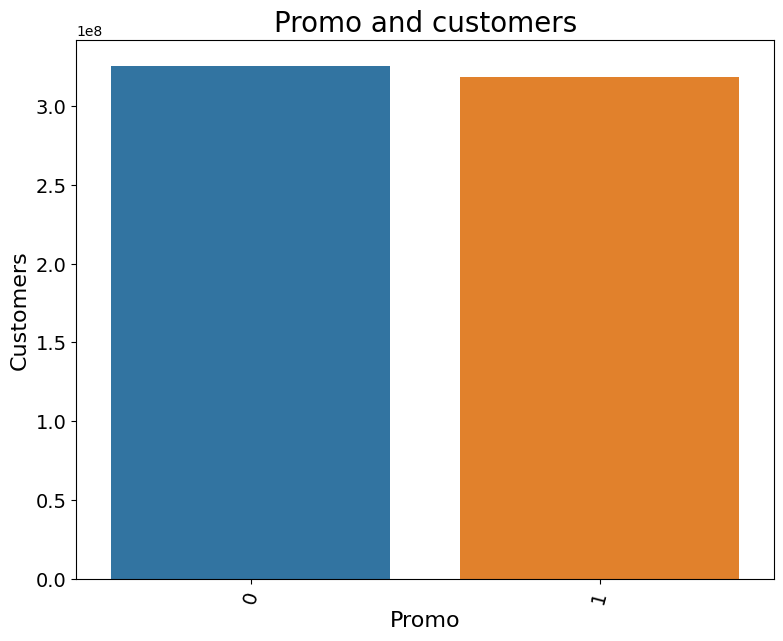

In [12]:
PLT.plot_bar(promo_custumers, 'Promo', 'Customers', 'Promo and customers', 'Promo', 'Customers')

##### Distribution of Promo in both datasets

<Figure size 900x700 with 0 Axes>

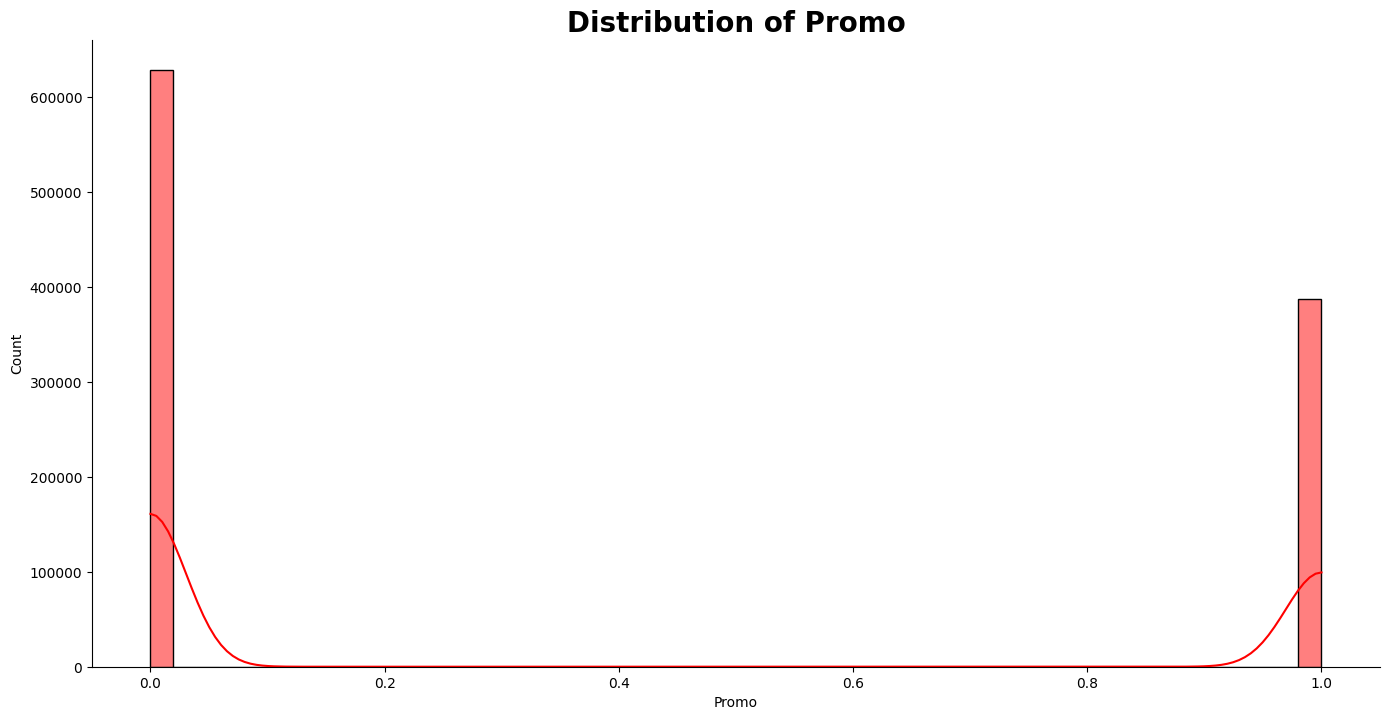

In [13]:
# Distribution of promo in train data

PLT.plot_hist(train_data,'Promo','red')

<Figure size 900x700 with 0 Axes>

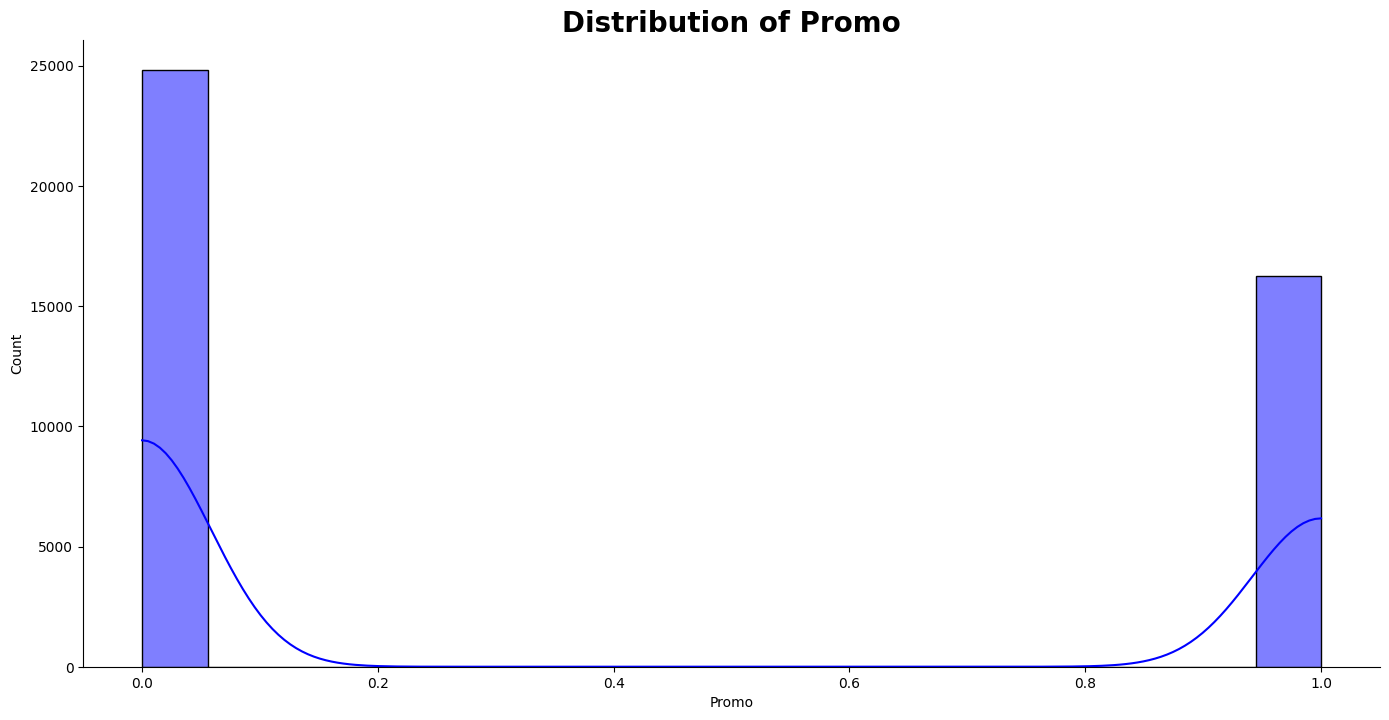

In [14]:
# Distribution of promo in test data
PLT.plot_hist(test_data,'Promo','blue')

In [15]:
# Finding out the total promotion percentage in both datasets
promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

# Printing the number of percentages
print(f'Test Data Promotion Percentage: { promo_test_percentage:.2%}')
print(f'Train Data Promotion Percentage:  {promo_train_percentage:.2%}')


Test Data Promotion Percentage: 39.58%
Train Data Promotion Percentage:  38.15%


*From the above observations, We can say the promotion is distributed almost similarly! 

# Q2: Check & compare sales behavior before, during and after holidays

In [16]:
# Finding out the state holiday field
train_data['StateHoliday'].value_counts().index.tolist()

['0', 'a', 'b', 'c']

In [17]:
# Changing the data types of the fields to string
train_data['StateHoliday'] = train_data['StateHoliday'].values.astype(str)
train_data['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

Description of the fields
*  0 = None
*  a = public holiday,
*  b = Easter holiday, 
*  c = Christmas

In [18]:
# Changing the state holiday fields to their description

train_data['StateHoliday'].replace({'0':'No Holiday','a':'Public Holiday','b':'Easter Holiday','c':'Christmas Holiday'},inplace=True)

In [19]:
train_data['StateHoliday'].value_counts().index.tolist()

['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas Holiday']

In [20]:
# Sales Comparision on State Holiday

train_store_holiday = train_data.groupby('StateHoliday').agg({'Sales': 'mean'})
train_store_holiday['StateHoliday'] = train_store_holiday.index

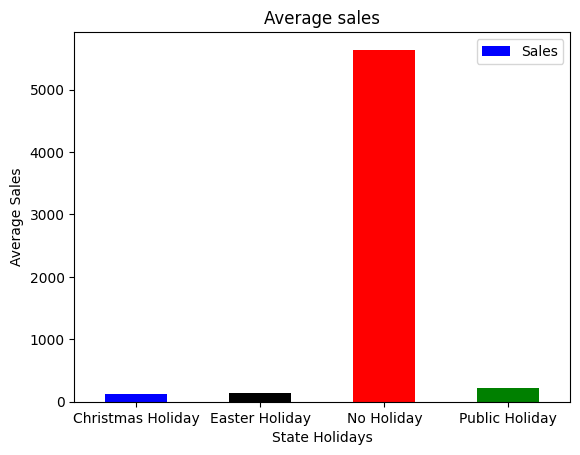

In [21]:
# Plotting the average sales per State holidays

train_store_holiday.plot(kind='bar',x='StateHoliday',y='Sales',rot='0',color=['blue', 'black', 'red', 'green'])
plt.title('Average sales')
plt.xlabel('State Holidays')
plt.ylabel('Average Sales')
plt.savefig('../plots/average_sales_analysis.jpg')
plt.show()

* From the above plot it can be seen the purchase during no holidays (ordinary days) are more than the during holidays

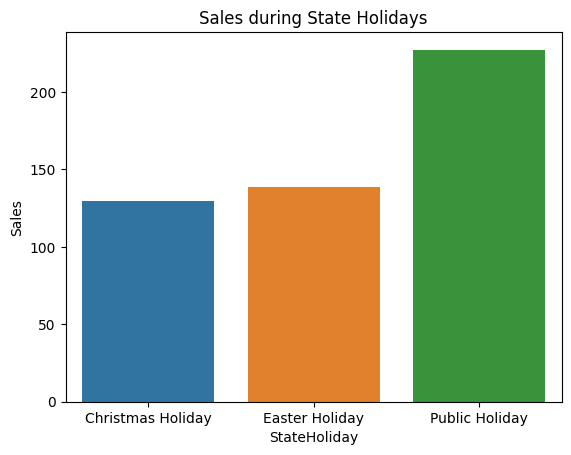

In [22]:
# Holiday
holidays = train_store_holiday.loc[train_store_holiday['StateHoliday']!='No Holiday']
sns.barplot(x="StateHoliday", y="Sales", data=holidays)
plt.title('Sales during State Holidays')
plt.savefig('../plots/sales_on_holidays.png')
plt.show()


In [23]:
df_train_store = train_data.copy()

In [24]:
# TODO!!!
#stores_types = ["Store type A", "Store type B", "Store type C", "Store type D"] 
#school_holidays = ["School is closed", "School is open"]
#assortment = [ "Basic", "Extra", "Extended"] 
#promo = ["Not participating", "Participating"]
#store_open = ["Closed", "Open"]

#df_train_store["StoreType"] = df_train_store["StoreType"].apply(lambda x: stores_types[x])

In [25]:
# TODO!!!
#df_train_store["StoreType"] = df_train_store["StoreType"].apply(lambda x: stores_types[x])
#store_type_df = df_train_store.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
#store_type_df = store_type_df.reset_index()
#store_type_df

Seasonality check

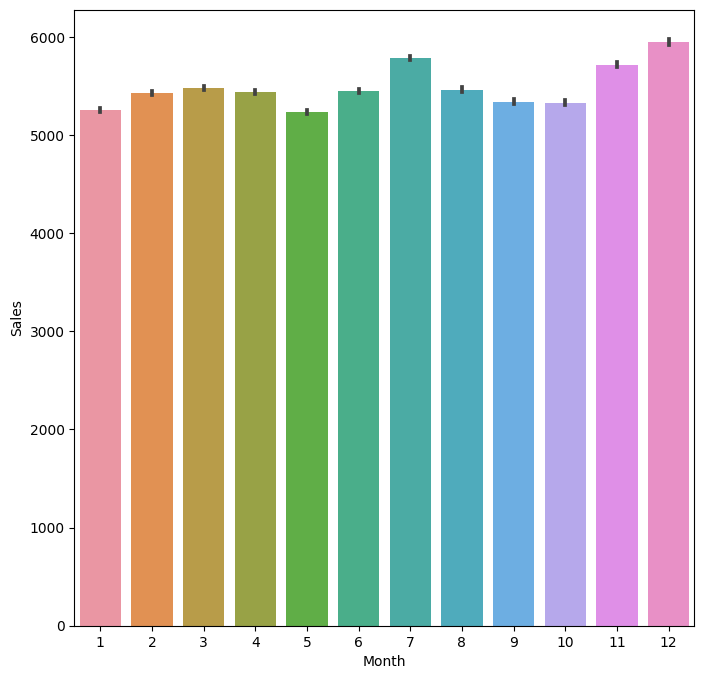

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x='Month', y='Sales', data=train_data)
plt.show()

In [27]:
train_data.to_csv('../data/train_clean_data.csv',index=False)

In [28]:
train_new = pd.read_csv('../data/train_clean_data.csv',index_col='Date')
train_new.head()

,Store,DayOfWeek,Year,Month,Day,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015,7,31,"5,263.00",555,1,1,No Holiday,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
2015-07-30,1,4,2015,7,30,"5,020.00",546,1,1,No Holiday,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
2015-07-29,1,3,2015,7,29,"4,782.00",523,1,1,No Holiday,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
2015-07-28,1,2,2015,7,28,"5,011.00",560,1,1,No Holiday,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0
2015-07-27,1,1,2015,7,27,"6,102.00",612,1,1,No Holiday,1,c,a,"1,270.00",9.00,"2,008.00",0,0.00,0.00,0


In [29]:
# Creating a date column from the index 

train_new['date'] = train_new.index
train_new['date'] = pd.to_datetime(train_new['date'])
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Year                       1017209 non-null  int64         
 3   Month                      1017209 non-null  int64         
 4   Day                        1017209 non-null  int64         
 5   Sales                      1017209 non-null  float64       
 6   Customers                  1017209 non-null  int64         
 7   Open                       1017209 non-null  int64         
 8   Promo                      1017209 non-null  int64         
 9   StateHoliday               1017209 non-null  object        
 10  SchoolHoliday              1017209 non-null  int64         
 11  StoreType                  101

Sales before, after and during holidays 

* Christmass Sales


In [30]:
# Finding out all the Christmas holidays

christmas_holiday_list = train_new['StateHoliday'].where(train_new['StateHoliday']=='Christmas Holiday')
christmas_holiday_list = christmas_holiday_list.dropna()
print(f'Christmas holidays from 2013-2015:\n {christmas_holiday_list.index.unique().tolist()}')

Christmas holidays from 2013-2015:
 ['2014-12-26', '2014-12-25', '2013-12-26', '2013-12-25']


In [31]:
# Creating the before after and during time stamp dataframe for 2014/15

before_index = (train_new["date"] >= pd.to_datetime("2014-11-25")) & (train_new["date"] < pd.to_datetime("2014-12-25")) # Taking the one month before xmass
before_xmass = train_new[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train_new["date"] >= pd.to_datetime("2014-12-25")) & (train_new["date"] < pd.to_datetime("2014-12-30")) # Thinking that the holiday will last for 6 days
during_xmass = train_new[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train_new["date"] >= pd.to_datetime("2015-01-01")) & (train_new["date"] < pd.to_datetime("2015-02-02"))# Taking the one month after xmass
after_xmass = train_new[after_index].groupby("date").agg({"Sales": "mean"})

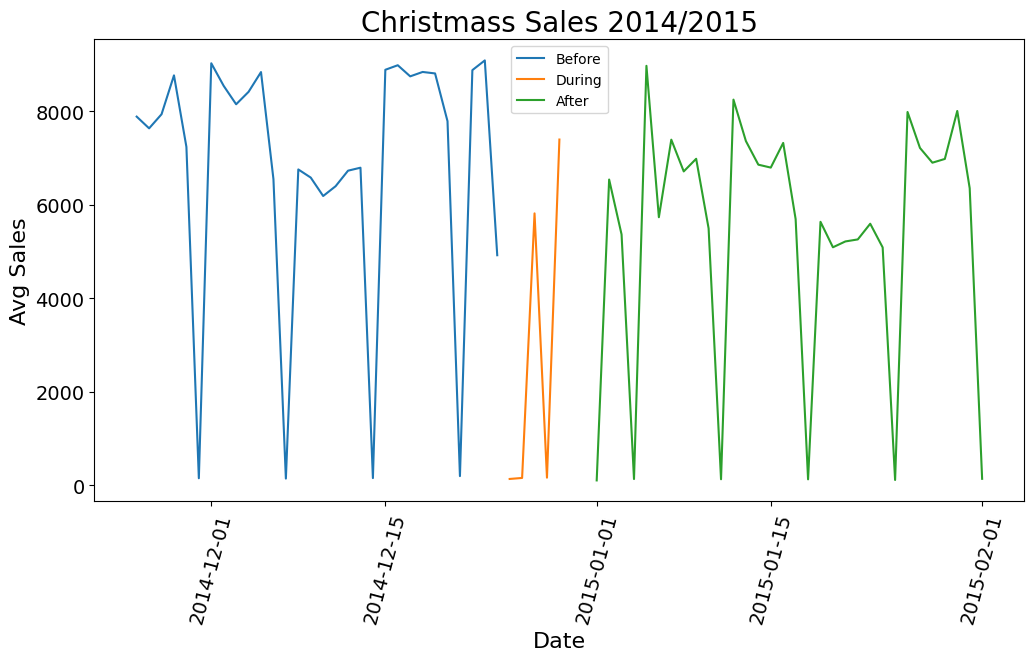

In [32]:
# Plotting the graph of xmass sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../plots/xmass_sales_14-15.jpg')
plt.show()

In [33]:
# Creating the before after and during time stamp dataframe for 2013/14

before_index = (train_new["date"] >= pd.to_datetime("2013-11-25")) & (train_new["date"] < pd.to_datetime("2013-12-25")) # Taking the one month before xmass
before_xmass = train_new[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train_new["date"] >= pd.to_datetime("2013-12-25")) & (train_new["date"] < pd.to_datetime("2013-12-30")) # Thinking that the holiday will last for 6 days
during_xmass = train_new[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train_new["date"] >= pd.to_datetime("2014-01-01")) & (train_new["date"] < pd.to_datetime("2014-02-02"))# Taking the one month after xmass
after_xmass = train_new[after_index].groupby("date").agg({"Sales": "mean"})

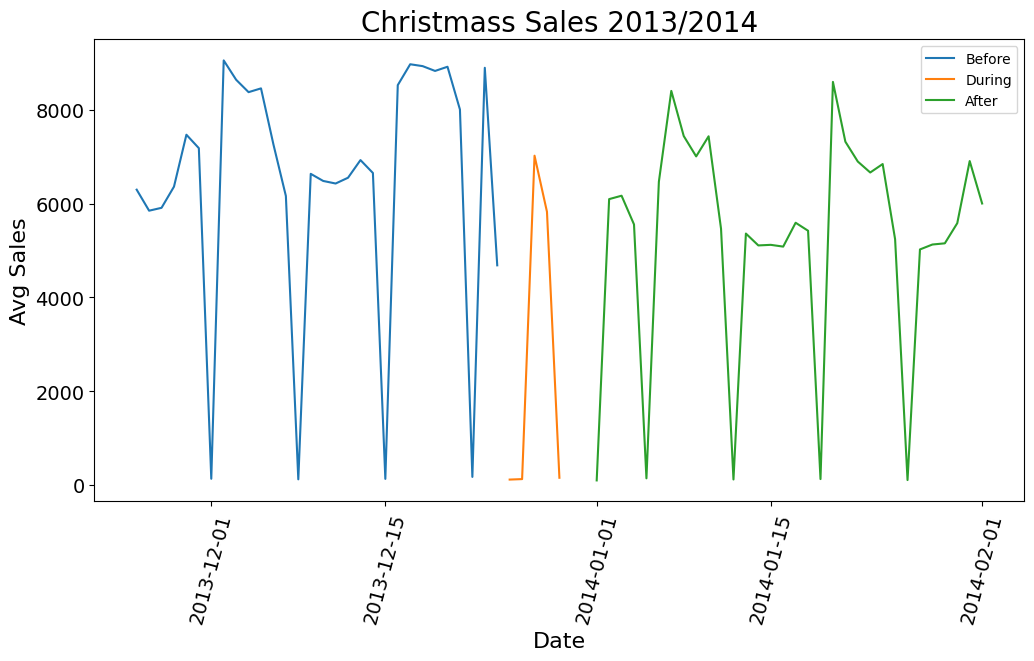

In [34]:
# Plotting the graph of xmass sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After')

plt.title("Christmass Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../plots/xmass_sales_13-14.jpg')
plt.show()


* From the above plots, it can be seen that the sales before christmass are greater than those during and after 

Easter sale

In [35]:
# Finding out all the easter holidays

easter_holiday_list = train_new['StateHoliday'].where(train_new['StateHoliday']=='Easter Holiday')
easter_holiday_list = easter_holiday_list.dropna()
print(f'Easter holidays from 2013-2015:\n {easter_holiday_list.index.unique().tolist()}')


Easter holidays from 2013-2015:
 ['2015-04-06', '2015-04-03', '2014-04-21', '2014-04-18', '2013-04-01', '2013-03-29']


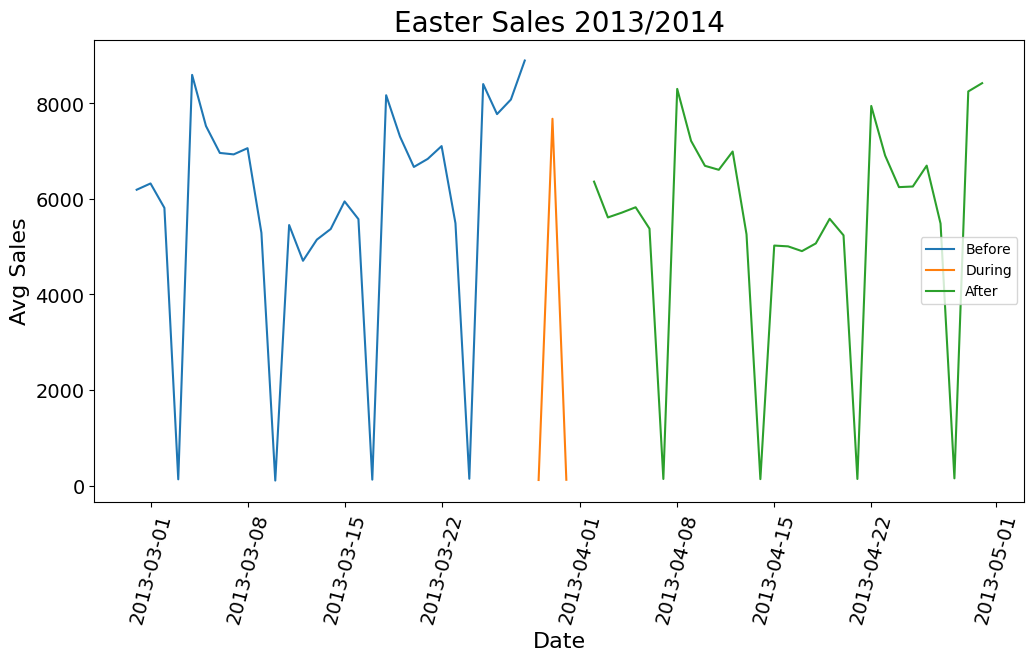

In [36]:
# Creating the before after and during time stamp dataframe for 2013/14

before_index = (train_new["date"] >= pd.to_datetime("2013-02-28")) & (train_new["date"] < pd.to_datetime("2013-03-29")) # Taking the one month before easter
before_easter = train_new[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train_new["date"] >= pd.to_datetime("2013-03-29")) & (train_new["date"] < pd.to_datetime("2013-04-01")) # Thinking that the holiday will last for 3 days
during_easter = train_new[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train_new["date"] >= pd.to_datetime("2013-04-02")) & (train_new["date"] < pd.to_datetime("2013-05-01"))# Taking the one month after easter
after_easter = train_new[after_index].groupby("date").agg({"Sales": "mean"})


# Plotting the graph of Easter sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_easter.index, y = before_easter["Sales"], label='Before')
sns.lineplot(x = during_easter.index, y = during_easter["Sales"], label='During')
sns.lineplot(x = after_easter.index, y = after_easter["Sales"], label='After')

plt.title("Easter Sales 2013/2014", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../plots/easter_sales_13-14.jpg')
plt.show()


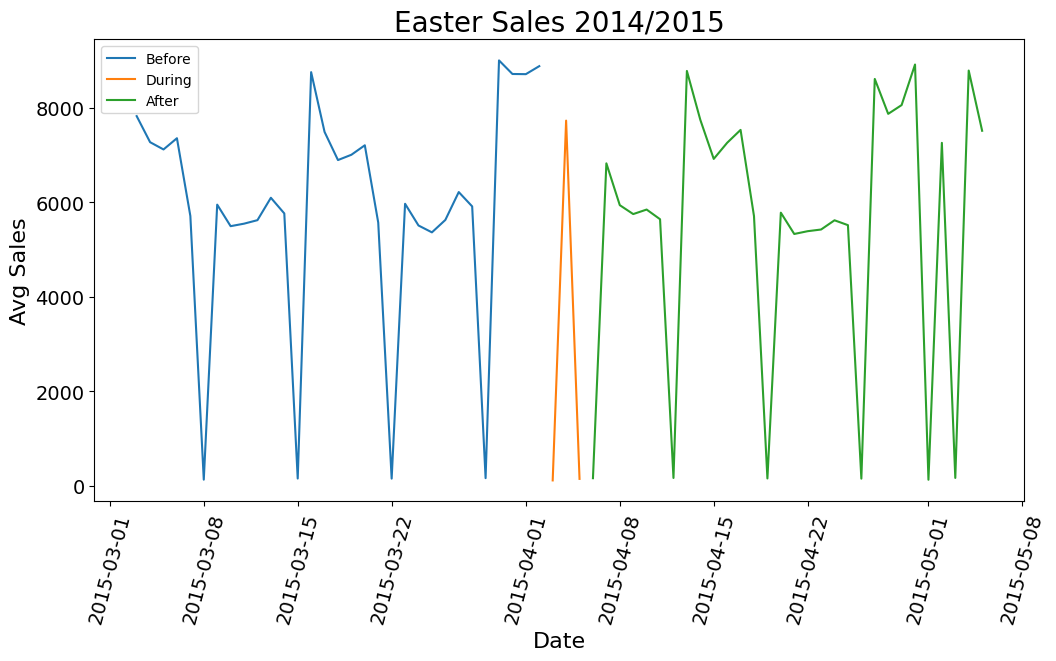

In [37]:
# Creating the before after and during time stamp dataframe for 2014/15

before_index = (train_new["date"] >= pd.to_datetime("2015-03-03")) & (train_new["date"] < pd.to_datetime("2015-04-03")) # Taking the one month before easter
before_easter = train_new[before_index].groupby("date").agg({"Sales": "mean"})

during_index = (train_new["date"] >= pd.to_datetime("2015-04-03")) & (train_new["date"] < pd.to_datetime("2015-04-06")) # Thinking that the holiday will last for 6 days
during_easter = train_new[during_index].groupby("date").agg({"Sales": "mean"})

after_index = (train_new["date"] >= pd.to_datetime("2015-04-06")) & (train_new["date"] < pd.to_datetime("2015-05-06"))# Taking the one month after easter
after_easter = train_new[after_index].groupby("date").agg({"Sales": "mean"})

# Plotting the graph of Easter sales before, after and during

plt.figure(figsize=(12, 6))

sns.lineplot(x = before_easter.index, y = before_easter["Sales"], label='Before')
sns.lineplot(x = during_easter.index, y = during_easter["Sales"], label='During')
sns.lineplot(x = after_easter.index, y = after_easter["Sales"], label='After')

plt.title("Easter Sales 2014/2015", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Avg Sales", fontsize=16)
plt.savefig('../plots/easter_sales_14-15.jpg')
plt.show()


* Again the sales before Easter are greater than during and after the holiday!

# Q4: correlation between sales and number of customers

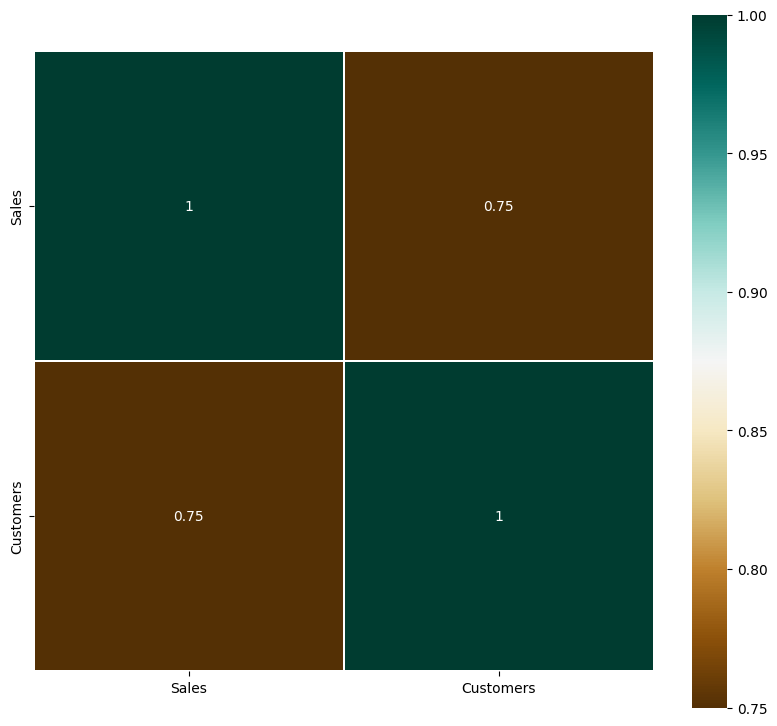

In [38]:
sales_customers = train_new[['Sales', 'Customers']]
plt.figure(figsize=(10,9))
sns.heatmap(sales_customers.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.BrBG, linecolor='white', annot=True)
plt.savefig("../plots/sales_customer_corr.png")
plt.show()

* It can be seen that customer number and sales are highly related!

# Q5: Promo's affect on Sales
* Are the promos attracting more customers? How does it affect already existing customers?



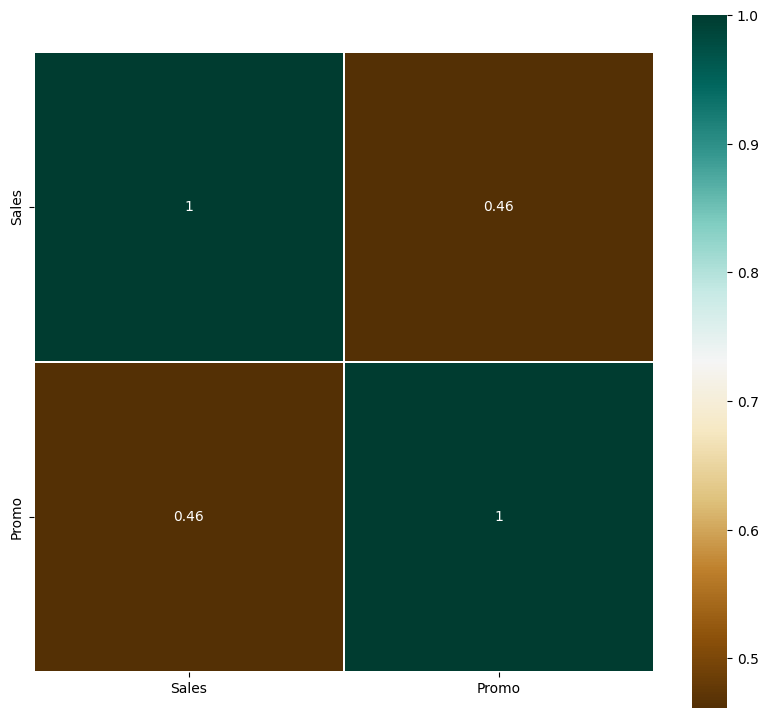

In [39]:
sales_promo = train_new[['Sales', 'Promo']]
plt.figure(figsize=(10,9))
sns.heatmap(sales_promo.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=plt.cm.BrBG, linecolor='white', annot=True)
plt.savefig("../plots/sales_promo_corr.png")
plt.show()

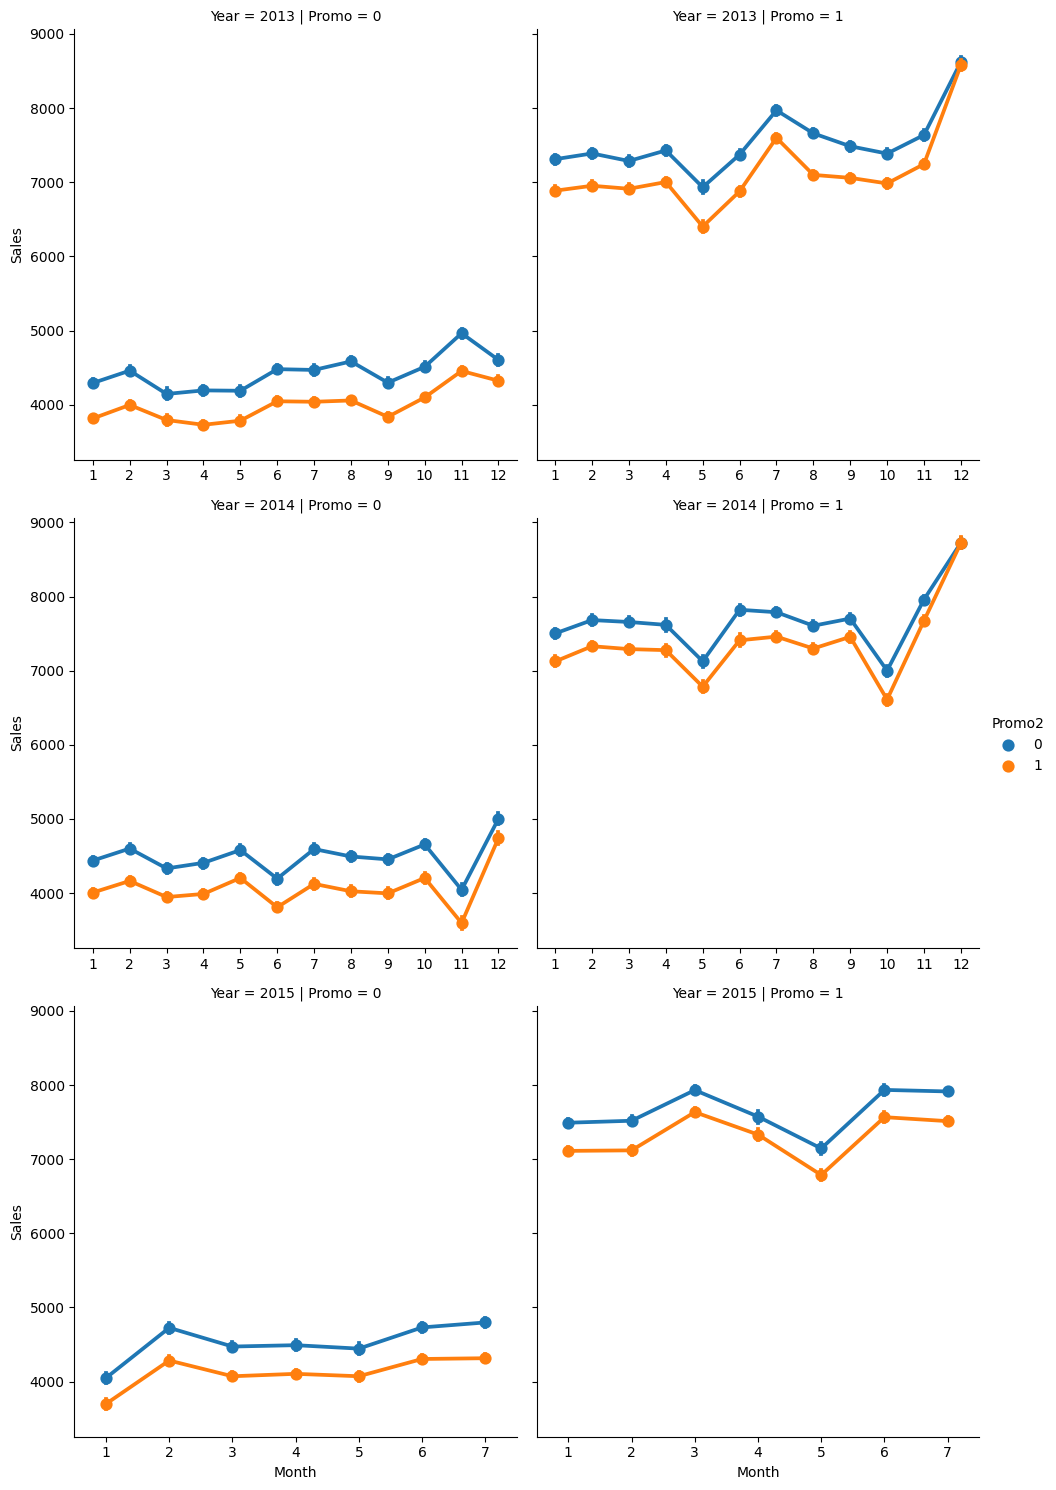

In [40]:
# Plotting the graph for all the years with promo available or not

sns.factorplot(data = train_new, x ="Month", y = 'Sales',col = 'Promo',  hue = 'Promo2', row = 'Year' ,sharex=False)
plt.savefig('../plots/sales_vs_promotion_factorplot.jpg')

* Promotion affects sales as it can be seen on the above correlation plot and factorplot!
* Promo2 can also be seen not performing as promo1. Every year it performs below promo 1

# Q6: Could the promos be deployed in more effective ways? 
* Which stores should promos be deployed in?

In [41]:
store_type_promo = train_new.groupby(["StoreType"]).agg({"Promo": 'mean', "Sales": "mean"}).reset_index()
store_type_promo

,StoreType,Promo,Sales
0,a,0.38,"5,391.37"
1,b,0.38,"7,465.97"
2,c,0.38,"5,487.99"
3,d,0.38,"5,509.06"


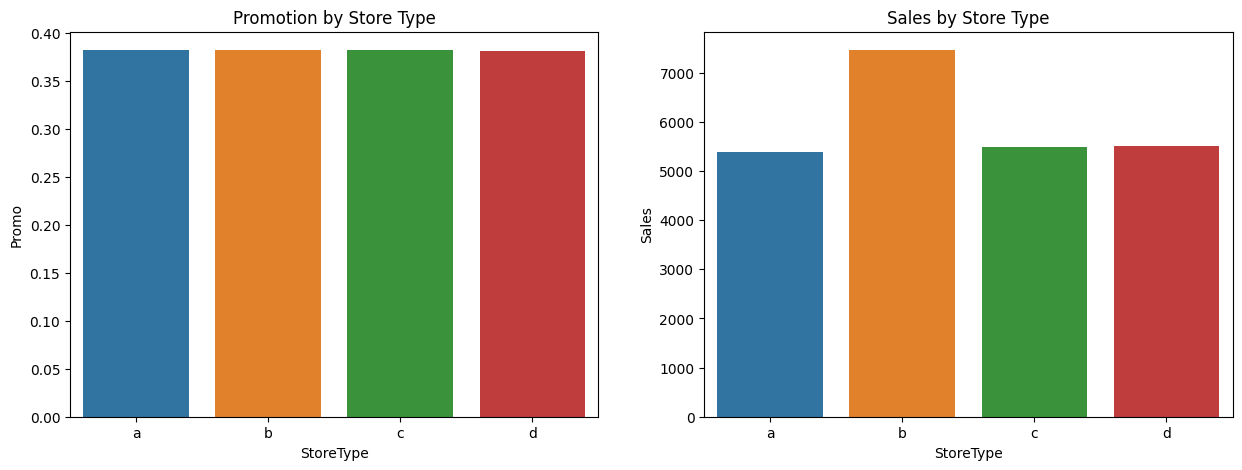

In [42]:
fig, (axi1, axi2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="StoreType", y="Promo", data=store_type_promo, ax=axi1).set_title("Promotion by Store Type")
sns.barplot(x="StoreType", y="Sales", data=store_type_promo, ax=axi2).set_title("Sales by Store Type")
plt.show()

- promotion distribution accross the storeTypes is similar.
- But sales per storeType is different. store-b has more sales while a,c,and d are lower.
- Promos can be deployed more in a,c,d type stores but also in a and c.

# Q7: Trends of customer behavior during store open and closing times

In [43]:
train_new['DayOfMonth'] = train_new['date'].apply(lambda x: x.day)
train_new['Weekday'] = train_new['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)
train_new.dtypes

Store                                 int64
DayOfWeek                             int64
Year                                  int64
Month                                 int64
Day                                   int64
Sales                               float64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
date                         datetime64[ns]
DayOfMonth                            int64
Weekday                         

In [48]:
train_new['Weekday'].value_counts()

1    727749
0    289460
Name: Weekday, dtype: int64

In [52]:
#train_new['Weekend'] = train_new['Weekday'].apply(lambda x:x==0)
#train_new.dtypes

In [45]:
closed_stores_df = train_new.loc[((train_new["Open"] == 0) & (train_new["Weekday"] == 0))]

closed_stores = closed_stores_df["Store"].value_counts().index.to_list()
stores_lis = train_new["Store"].value_counts().index.to_list()
open_stores = []

for x in stores_lis: 
    if (x not in closed_stores):
        open_stores.append(x)

print(len(stores_lis), len(closed_stores))


1115 1105


per-store sales for open stores:  8257.30467091295
Per-store sales for closed stores:  5446.829283709189


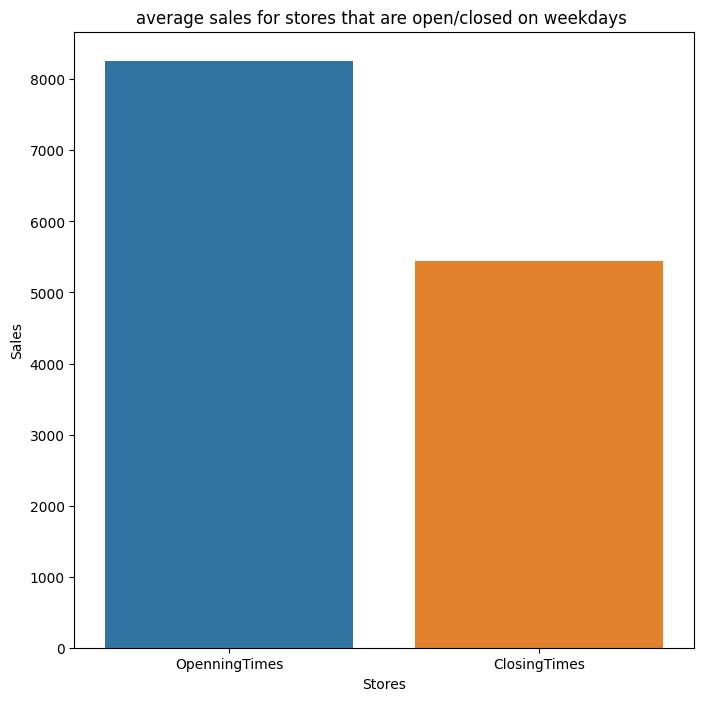

In [55]:
open_stores_df = train_new.loc[train_new["Store"].isin(open_stores)]
closed_stores_df = train_new.loc[train_new["Store"].isin(closed_stores)]

# sales in the weekend

print("per-store sales for open stores: ", (open_stores_df["Sales"].mean()))
print("Per-store sales for closed stores: ", (closed_stores_df["Sales"].mean()))

sales_weekday = {"Stores":["OpenningTimes", "ClosingTimes"], "Sales":[open_stores_df["Sales"].mean(), closed_stores_df["Sales"].mean()]}
plt.figure(figsize=(8,8))
sns.barplot(x = "Stores", y = "Sales", data= pd.DataFrame(sales_weekday))
plt.title("average sales for stores that are open/closed on weekdays ")
plt.savefig("../plots/sales_weekday.png")
plt.show()

* Sales on weekdays where stores are at open times are greater than during closing times.

# Q8: Which stores are opened on all weekdays? 
### How does that affect their sales on weekends? 

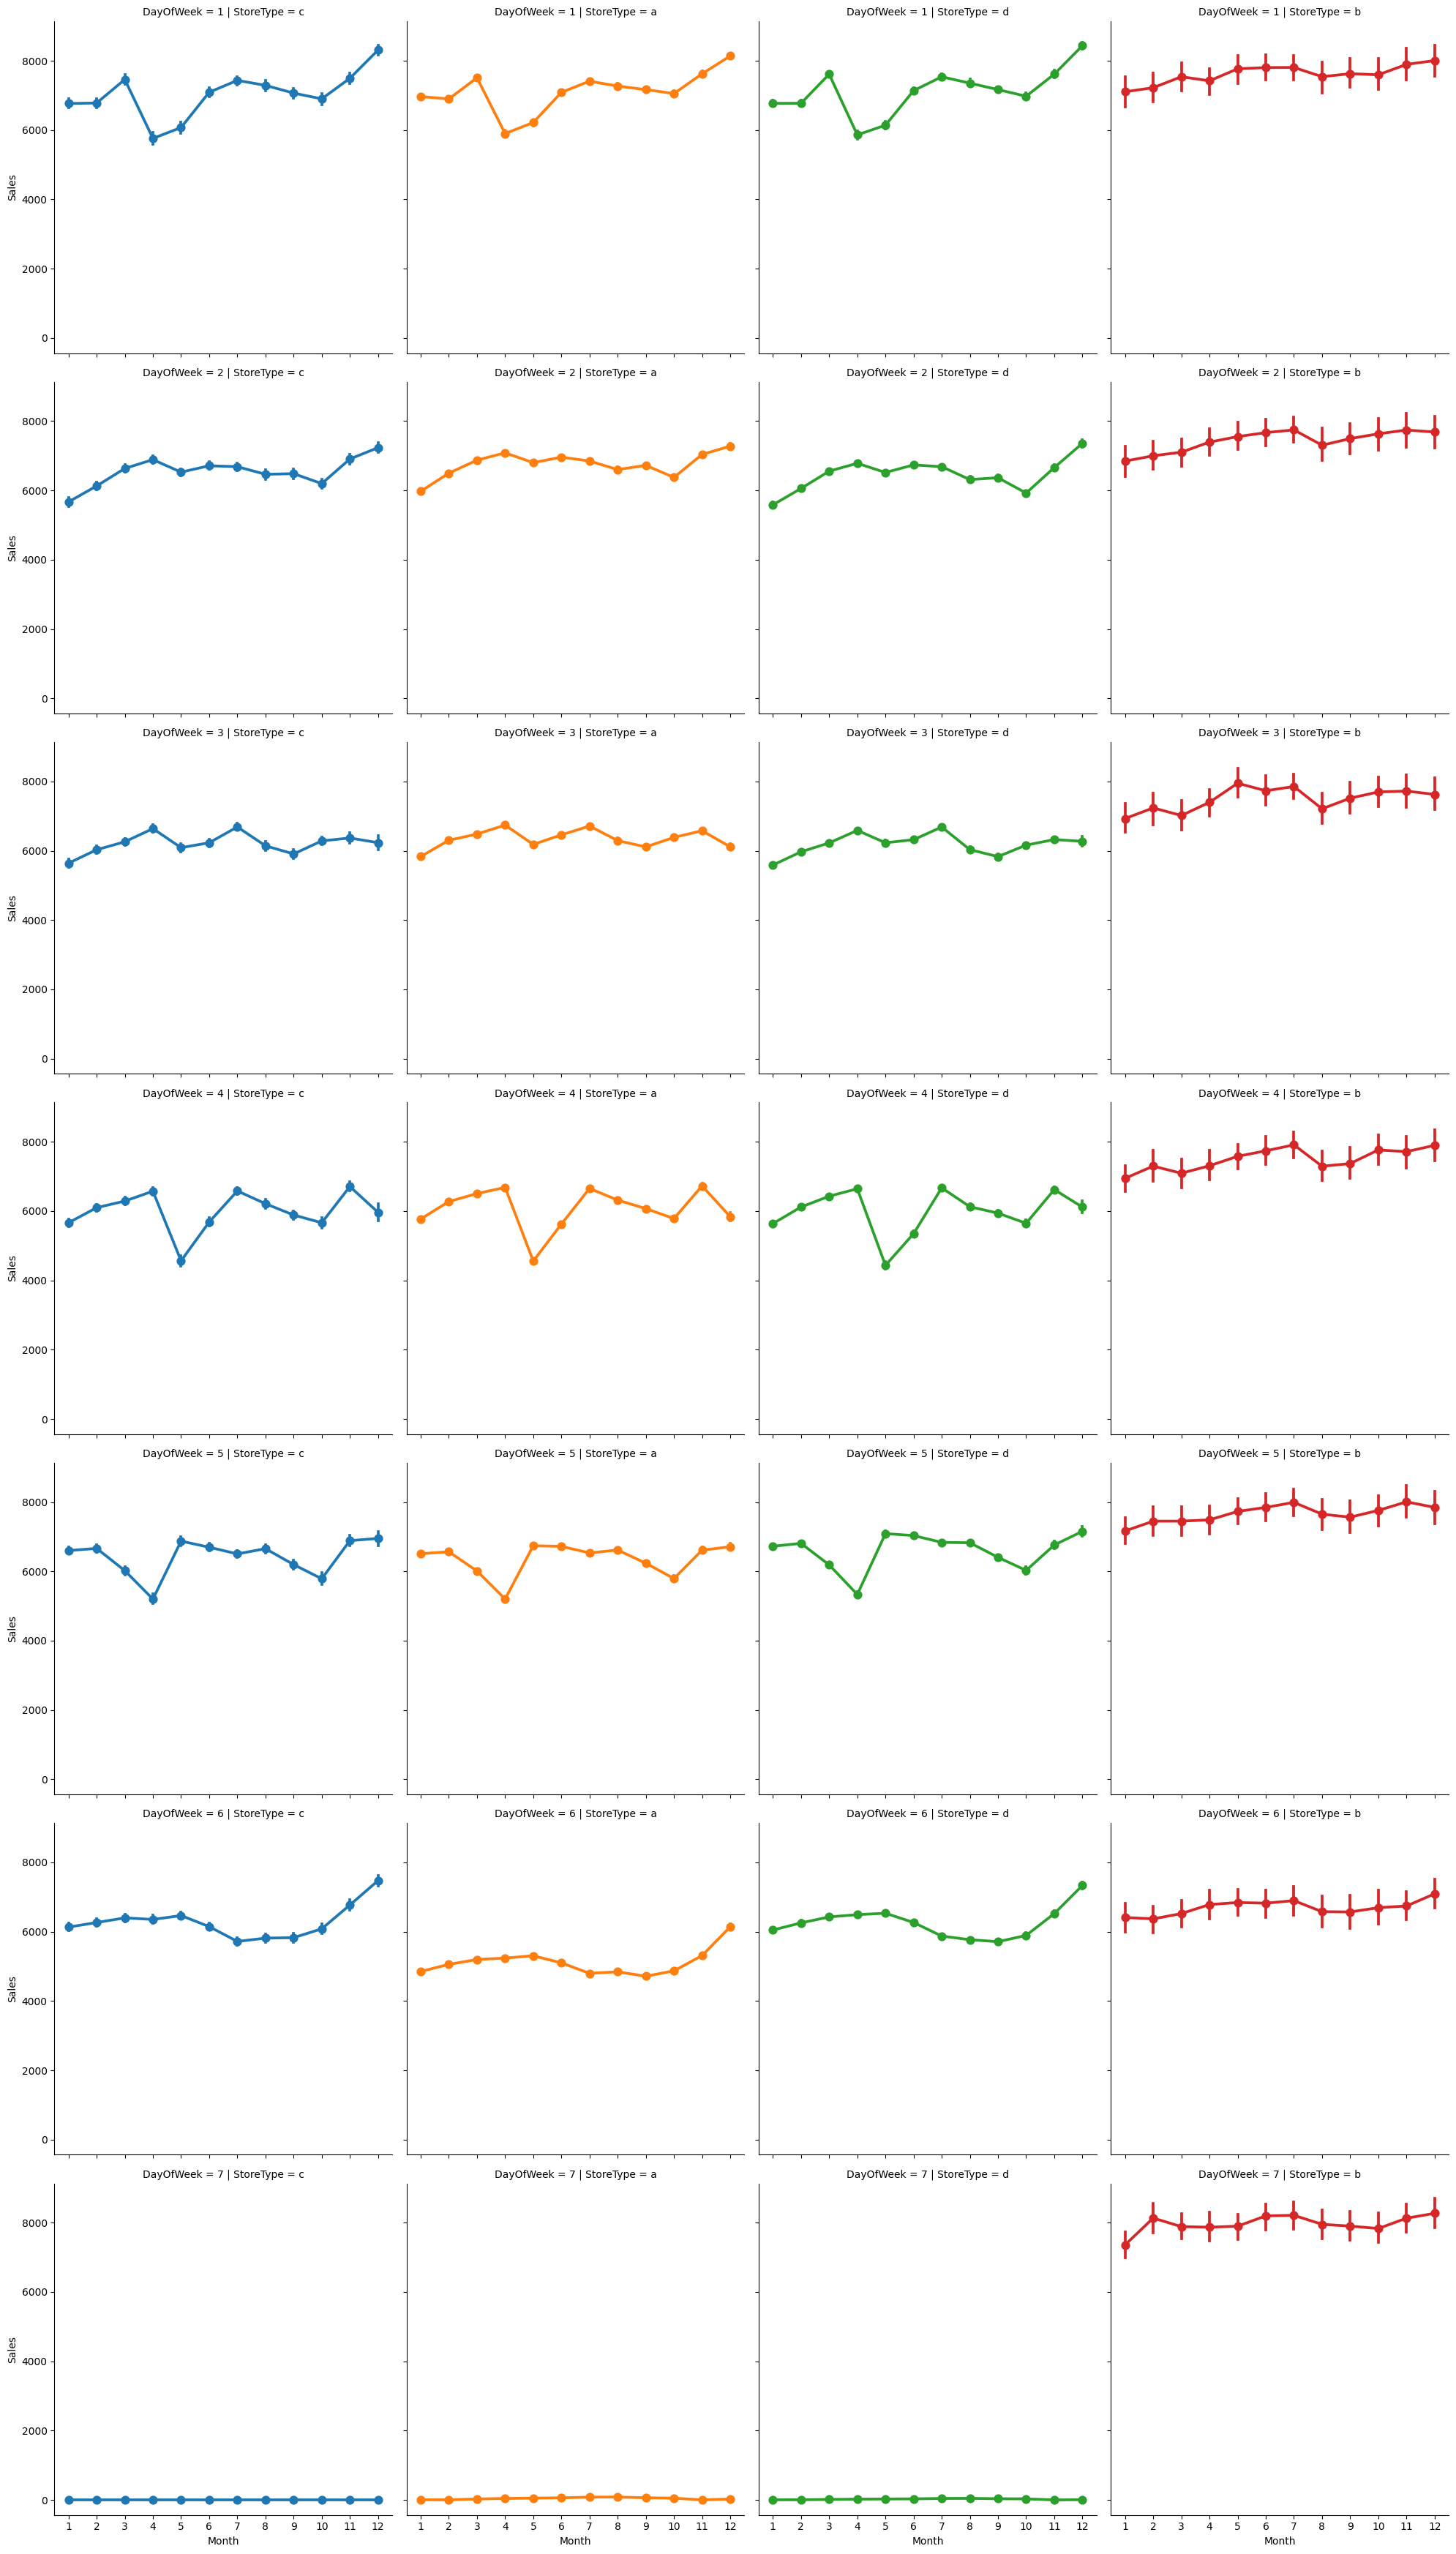

In [57]:
 # Customer trends over the closing and opening dates plotting

sns.factorplot(data = train_new, x = 'Month', y = "Sales", 
               col = 'StoreType', hue = 'StoreType',row = 'DayOfWeek', )
plt.savefig('../plots/customer_vs_week_viz.jpg')
plt.show()

### Conclusion on the above plot
* Sales is somewhat constant in every weekdays except on weekday 5(Friday). we can see there is a slight increase in sales on friday. 
* Store type-b has a constant sales activity in every days of week. It is also open in every days of a week while the other store types are closed on Sunday!